# **0.Introduction**

Ce notebook google colab contient l'ensemble des éléments à rendre du premier sprint projet de la formation Data Scientist de DataScienTest.

## Présentation du projet e-pyphyte

Le projet s'appelle e-pyphyte. L’objectif de ce projet est de localiser et classifier l’espèce d’une plante dans une image. Une fois la classification faite,  l’utilisateur recevra une description de celle-ci et l'identification de la maladie si possible. L’application sera donc capable à partir d’une image prise par l'appareil photo de donner une succession d’informations à l’utilisateur.

## L'équipe
L'équipe projet est la suivante:
- Ali MALLEM (ali.mallem75@gmail.com)
- Benoit FLAMENT (bspam01@gmail.com)
- Cédric LEJARD (cedric.lejard.formation@gmail.com)
- Pierre-Antoine MEURENS (pa.meurens@gmail.com)

La coach de ce projet est: Laurene

##Sprint 1
Date de début: 16/10/2021

Date de fin: 14/10/2021

Les rendus pour le 1er sprint sont:
 - Exploration des jeux de données (choix du jeu de données, présentation des variables, nombres d’images, # classes, distribution, type de fichiers, RGB ou n&b...)
 - DataViz (4 ou 5 visualisations intéressantes avec une interprétation 'métier' comme expliqué dans le message de synthèse de projet epinglé sur ce canal)

# **1.Sélection du jeu de données**

![](https://drive.google.com/uc?export=view&id=)
Sur les 6 jeux de données du sujet dont 3 concernant l'identification de l'espèce et 3 concernants les maladies sur les plantes nous avons sélectionné:

https://www.kaggle.com/vipoooool/new-plant-diseases-dataset,

En voici les raisons:

### IDENTIFICATION DE L'ESPECE
####---Jeux de données N°1:
https://www.kaggle.com/vbookshelf/v2-plant-seedlings-dataset

Ce jeu a pour but de détecter les mauvaises herbes dans la culture de maïs. Il y a 12 classes (12 plantes) dont la classe de référence le maïs.
Bien qu'intéressant et complet, ce jeu de données ne contient que des jeunes pousses et non des plantes adultes. Il n'a pas été sélectionné en faveur des jeux de données sur des plantes adultes.
Néanmoins il sera peut être intégré dans des sprints ultérieurs pour enrichir le modèle de classification.
Exemple de photos:

![](https://drive.google.com/uc?export=view&id=1DNtVI9NpfJvVfC4h_uT6C3hFcHC3pr5B)



####Jeux de données N°2:
https://storage.googleapis.com/openimages/web/download.html

Bien que cette bibliothèque d'image contienne 1,743,042 images classées, il ne s'agit que d'images de la vie quotidienne. Il n'y a pas de catégorie liée aux plantes, seulement quelques fruits et légumes comme le melon ou la tomate mais en rien des images de plantes classées par espèce.
Le jeu de données est hors sujet par rapport à notre problématique.

Exemple de résultats de recherche sur "Plant":
![](https://drive.google.com/uc?export=view&id=12Gx9Chk0n7PeLZXQliYhqWzeL0rVVcHb)

####Jeux de données N°3:
https://cocodataset.org/#home

De la même manière que le lien précédent il s'agit d'une bibliothèque d'images anotées immense (123,287 images) mais non dédiée aux plantes. Au mieux, il y a une catégorie plante.
Le jeu de données est hors sujet par rapport à notre problématique.

Exemple d'image avec une "plante":

![](https://drive.google.com/uc?export=view&id=15KY-ChXmWo9YQatgV9qVm8BY5FHcZU3m)

###MALADIE SUR LES PLANTES
Concernant les maladies sur les plantes, nous avons 3 jeux de données à notre disposition :

- new-plant-diseases-dataset : https://www.kaggle.com/vipoooool/new-plant-diseases-dataset

- plant-disease : https://www.kaggle.com/saroz014/plant-disease

- plantvillage-dataset : https://www.kaggle.com/abdallahalidev/
plantvillage-dataset

Après comparaison binaire entre les jeux de données, il s'avère que toutes les photos du jeu de données "plant-disease" sont contenues dans les 2 autres jeux de données.

Le jeu de données "plantvillage_dataset" est constitué de 3 dossiers :
- color : photos en couleur
- grayscale : photos en noir & blanc qui correspondent aux photos couleurs
- segmented : photos détourées en couleur qui correspondent aux photos couleurs.

A l'exception des photos ci-dessous, toutes les photos du dossier 'color' sont contenues dans le jeu de données "new-plant-diseases-dataset"

- Orange___Haunglongbing_(Citrus_greening) : 2994 photos
- Soybean___healthy : 2563 photos
- Tomato___Tomato_Yellow_Leaf_Curl_Virus : 2906 photos

Pour toutes ces raisons, nous portons notre choix sur le jeu de données new-plant-diseases-dataset.




# **2.Exploration des données : New-Plant-Deseases-dataset**

## 2.0.Telechargement et décompression du dataset sélectionné

In [ ]:
#install Kaggle
!pip install -q kaggle

from google.colab import files
files.upload()

#create kaggle folder
!mkdir ~/.kaggle

#copy kaggle.jason ~/.kaggle
! cp kaggle.json ~/.kaggle

#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download vipoooool/new-plant-diseases-dataset
!unzip new-plant-diseases-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant disea

## 2.1.Mise en forme des données dans un dataframe



### Création du dataframe

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image

# Import des lib pour la partie visualization 
import matplotlib.pyplot as plt
import seaborn as sns


def resolution(nom_fichier_complet):
    try:
        img = Image.open(nom_fichier_complet)
        return str(img.size[0])+"x"+str(img.size[1])
    except Exception as e:
        #return str(e)
        return np.nan

def poids(nom_fichier_complet):
    try:
        p = os.path.getsize(nom_fichier_complet)
        return p
    except:
        return np.nan

df_new_plant_disease = pd.DataFrame()
for (repertoire, sousRepertoires, fichiers) in os.walk('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'):
    df_temp = pd.DataFrame(data=fichiers, columns=['fichier'])
    df_temp['dossier'] = repertoire
    df_new_plant_disease = pd.concat([df_new_plant_disease, df_temp], axis = 0)

df_new_plant_disease['chemin_complet'] = df_new_plant_disease['dossier'] +'/'+ df_new_plant_disease['fichier']
df_new_plant_disease['resolution'] = df_new_plant_disease['chemin_complet'].apply(lambda x: resolution(x))
df_new_plant_disease['poids'] = df_new_plant_disease['chemin_complet'].apply(lambda x: poids(x))
df_new_plant_disease['dossier']=df_new_plant_disease['dossier'].apply(lambda x: x[76:])
df_new_plant_disease['train_valid']=df_new_plant_disease['dossier'].apply(lambda x: x.split('/')[0])
df_new_plant_disease['plante_maladie']=df_new_plant_disease['dossier'].apply(lambda x: x.split('/')[1])
df_new_plant_disease['plante']=df_new_plant_disease['plante_maladie'].apply(lambda x: x.split('___')[0])
df_new_plant_disease['maladie']=df_new_plant_disease['plante_maladie'].apply(lambda x: x.split('___')[1])
df_new_plant_disease['nom_fichier']=df_new_plant_disease['fichier'].apply(lambda x: os.path.splitext(x)[0])
df_new_plant_disease['extension']=df_new_plant_disease['fichier'].apply(lambda x: os.path.splitext(x)[1])
df_new_plant_disease = df_new_plant_disease.drop('dossier', axis=1)

# Segmentation du nom_fichier : code vs ref : création colonnes
df_new_plant_disease['nom_fichier_code'] = df_new_plant_disease.nom_fichier.apply(lambda nom: nom.split('___')[0] if len(nom.split('___'))>1 else np.nan)
df_new_plant_disease['nom_fichier_ref'] = df_new_plant_disease.nom_fichier.apply(lambda nom: nom.split('___')[1] if len(nom.split('___'))>1 else nom.split('___')[0])

# Isoler modification photo du nom_fichier_ref dans un champ 'photo_changed'
df_new_plant_disease['photo_changed'] = df_new_plant_disease.nom_fichier_ref.apply(lambda nom: nom.split('_')[2] if len(nom.split('_'))>2 else 'NA_manuel')

### Visualisation de quelques images du dataset


In [ ]:
# fonction d'affichage générique : on donne X,Y les nombre de lignes et colonnes du subplot et un dataframe d'au plus X*Y lignes (la fct ne réalise pas elle meme la factorisation), 
# la fonction affiche les images correspondantes
# En titre de chaque vignette, on affiche l'indx de la ligne du dataframe
# la fct requiert le chargement de matplotlib.pyplot
from IPython.display import display, HTML



def affiche_images(df,X,Y):

  if len(df)>X*Y:
    print("Warning : Le dataframe est plus grand que la grille d'image, les lignes supplémentaires seront ignorées")

  ref = df.index
  plt.figure(figsize=(3*X,3*Y))

  for i in range(min(len(df),X*Y)):

    plt.subplot(X,Y,i+1)
    plt.imshow(plt.imread(df.iloc[i].chemin_complet))
    plt.axis('off')
    plt.title('Index =' + str(ref[i]))

  display(HTML(df[['plante','maladie','nom_fichier_ref','photo_changed']].to_html()))




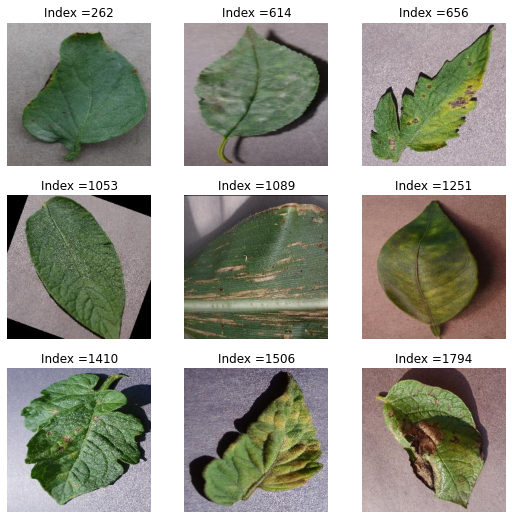

In [ ]:
# à relancer plusieurs fois pour visualiser quelques exemples aléatoires
N=3
perm=np.random.permutation(len(df_new_plant_disease))
perm=perm[:N**2]
df_tmp=df_new_plant_disease.iloc[perm].sort_index()
affiche_images(df_tmp,N,N)


### Analyse et vérification du critère "photo_changed"
Analyse montrant que les cas où photo_changed commence par ['FL', 'Lab', 'o'] doivent être exclus (non duplication/modification image)

In [ ]:
# Isoler modification photo = 'photo_changed' : Check
df_new_plant_disease[['nom_fichier','nom_fichier_ref','nom_fichier_code','photo_changed']].head(3)

nom_fichier  ... photo_changed
0  fd35fb86-6558-40f2-b8ac-6922e2107af5___RS_LB 4...  ...        flipTB
1  6033f0b2-48e7-411c-a39b-86297f412c19___RS_LB 4...  ...        flipTB
2  5ba52ca6-9cd2-4fad-914a-af2f8fea65c6___RS_LB 4740  ...     NA_manuel

[3 rows x 4 columns]

In [ ]:
# Isoler modification photo dans nom_fichier_ref = 'photo_changed' : Check suite
# On trouve des ref type 'FL 1197' dans photo_changed :
print('\n photo_changed \n',df_new_plant_disease[df_new_plant_disease.photo_changed!='NA_manuel'].count(),'\n')
df_new_plant_disease.photo_changed.value_counts()


 photo_changed 
 fichier             47451
chemin_complet      47451
resolution          47451
poids               47451
train_valid         47451
plante_maladie      47451
plante              47451
maladie             47451
nom_fichier         47451
extension           47451
nom_fichier_code    46259
nom_fichier_ref     47451
photo_changed       47451
dtype: int64 



NA_manuel         40416
flipLR             8491
180deg             8198
flipTB             6805
new30degFlipLR     4822
                  ...  
Lab 02061             1
FL 0756               1
Lab 02487             1
FL 1645               1
FL 0860               1
Name: photo_changed, Length: 5629, dtype: int64

In [ ]:
# Isoler modification photo dans nom_fichier_ref = 'photo_changed' : Check suite
# On trouve des ref type 'FL 1197' dans photo_changed ie ne correspondet pas à des modif d'images : ils correspondent aux lignes ayant moins de 5 occurences
df_group = df_new_plant_disease[['photo_changed','fichier']].groupby('photo_changed').count()
print(df_group[(df_group.fichier > 5)])
print(df_group[(df_group.fichier < 6) & ( 1 < df_group.fichier) ])
print(df_group[(df_group.fichier == 1)])

                 fichier
photo_changed           
180deg              8198
270deg              4174
90deg               4174
NA_manuel          40416
flipLR              8491
flipTB              6805
new200degFlipLR      152
new200degFlipTB      152
new30degFlipLR      4822
new30degFlipTB       427
new90degFlipLR       152
new90degFlipTB       152
newGGR               152
newGRR               427
newPixel25          2179
               fichier
photo_changed         
FL 0011              5
FL 0019              5
FL 0023              5
FL 0038              5
FL 0042              5
...                ...
FL 9940              5
FL 9947              5
FL 9950              5
FL 9978              5
FL 9986              5

[470 rows x 1 columns]
               fichier
photo_changed         
FL 0004              1
FL 0005              1
FL 0006              1
FL 0007              1
FL 0008              1
...                ...
Lab Leaf 9305        1
Lab Leaf 9307        1
Lab Leaf 9310        1

In [ ]:
# Isoler modification photo dans nom_fichier_ref = 'photo_changed' :
# On trouve des ref type 'FL 1197' dans photo_changed ie ne correspondent pas à des modif d'images : pn peut les identifier par le premier mot (séparation ' ')
df_non_changed = df_group[df_group.fichier<6].reset_index()
df_non_changed['debut'] = df_non_changed.photo_changed.apply(lambda nom: nom.split(' ')[0])
df_non_changed.debut.value_counts()
# Les valeurs commencent par : FL     3080, Lab    2533, o         1

FL     3080
Lab    2533
o         1
Name: debut, dtype: int64

In [ ]:
# Isoler modification photo dans nom_fichier_ref = 'photo_changed' : Check suite => cas ne correspondent à une modif image
# Filter les réelles modifications d'images : plus de 6 occurences
df_non_changed = df_group[df_group.fichier>5].reset_index()
df_non_changed['debut'] = df_non_changed.photo_changed.apply(lambda nom: nom.split(' ')[0])
df_non_changed.debut
# liste des 14 valeurs : 180deg, 270deg, 90deg, flipLR, flipTB, new200degFlipLR, new200degFlipTB, new30degFlipLR, new30degFlipTB, new90degFlipLR, new90degFlipTB, newGGR, newGRR, newPixel25

0              180deg
1              270deg
2               90deg
3           NA_manuel
4              flipLR
5              flipTB
6     new200degFlipLR
7     new200degFlipTB
8      new30degFlipLR
9      new30degFlipTB
10     new90degFlipLR
11     new90degFlipTB
12             newGGR
13             newGRR
14         newPixel25
Name: debut, dtype: object

### Finalisation du dataframe: photo_changed/nom_fichier, format des champs

In [ ]:
# Isoler modification photo dans nom_fichier_ref = 'photo_changed'
# Récupération des réelles modifications en excluant les cas qui debutent par FL, Lab, o
# (équivalent à conserver les 14 vraies valeurs : 180deg, 270deg, 90deg, flipLR, flipTB, new200degFlipLR, new200degFlipTB, new30degFlipLR, new30degFlipTB, new90degFlipLR, new90degFlipTB, newGGR, newGRR, newPixel25)
def photo_changed_nom(nom):
  decoupe = nom.split('_')
  result = 'NA_manuel'
  if len(decoupe)>2:
    if not (decoupe[2].split(' ')[0] in ['FL','Lab','o']):
      result=decoupe[2]
  return result
df_new_plant_disease['photo_changed'] = [photo_changed_nom(nom) for nom in df_new_plant_disease.nom_fichier_ref]

# Ajustement du nom de fichier_ref pour retirer la partie photo_changed désormais isolée
def reduit_photo_changed(nom, photo_changed):
  if photo_changed=='NA_manuel':
    result = nom
  else:
    result = nom.split('_' + photo_changed)[0]
  return result

df_new_plant_disease['nom_fichier_ref'] = [ reduit_photo_changed(nom, photo_changed) for nom, photo_changed in zip(df_new_plant_disease.nom_fichier_ref,df_new_plant_disease.photo_changed)]
df_new_plant_disease.head()


# Changement du type pour string sauf fichier et poids
# df_new_plant_disease.dtypes : initialement 'object' sauf 'poids' qui est 'int'
df_new_plant_disease[['fichier','chemin_complet','resolution','train_valid','plante_maladie','plante','maladie','nom_fichier','extension','nom_fichier_code','nom_fichier_ref','photo_changed']] = df_new_plant_disease[['fichier','chemin_complet','resolution','train_valid','plante_maladie','plante','maladie','nom_fichier','extension','nom_fichier_code','nom_fichier_ref','photo_changed']].astype('string')

In [ ]:
df_new_plant_disease.head(1)

fichier  ... photo_changed
0  fd35fb86-6558-40f2-b8ac-6922e2107af5___RS_LB 4...  ...        flipTB

[1 rows x 13 columns]

### Complément d'analyse nécesaire sur photo_changed : duplication 'copy'

In [ ]:
df_new_plant_disease[ df_new_plant_disease.nom_fichier_code=='07f54257-0ec8-4bce-991f-90d46646d4f8']

fichier  ...   photo_changed
383   07f54257-0ec8-4bce-991f-90d46646d4f8___RS_GLSp...  ...       NA_manuel
289   07f54257-0ec8-4bce-991f-90d46646d4f8___RS_GLSp...  ...  new30degFlipLR
895   07f54257-0ec8-4bce-991f-90d46646d4f8___RS_GLSp...  ...           90deg
1468  07f54257-0ec8-4bce-991f-90d46646d4f8___RS_GLSp...  ...          270deg

[4 rows x 13 columns]

In [ ]:
# Le code ne semble finalement pas être l'identifiant unique
# Exemple ou l enom de fichier comporte 'RS_GLSp 4378'
# On trouve 3 copies : original, copy, copy2 avec 3 code fichiers différents
  
df_new_plant_disease['nom_fichier_filtrer'] = [ 'RS_GLSp 4378' in nom for nom in df_new_plant_disease.nom_fichier_ref ]
df_new_plant_disease[df_new_plant_disease['nom_fichier_filtrer']]


fichier  ... nom_fichier_filtrer
2     0140764c-6157-4995-9ada-9c10b81af3b8___RS_GLSp...  ...                True
32    0140764c-6157-4995-9ada-9c10b81af3b8___RS_GLSp...  ...                True
206   34ed1bf6-87eb-49dd-bc0b-fd9d0bd3dd0c___RS_GLSp...  ...                True
278   34ed1bf6-87eb-49dd-bc0b-fd9d0bd3dd0c___RS_GLSp...  ...                True
383   07f54257-0ec8-4bce-991f-90d46646d4f8___RS_GLSp...  ...                True
172   0140764c-6157-4995-9ada-9c10b81af3b8___RS_GLSp...  ...                True
289   07f54257-0ec8-4bce-991f-90d46646d4f8___RS_GLSp...  ...                True
563   34ed1bf6-87eb-49dd-bc0b-fd9d0bd3dd0c___RS_GLSp...  ...                True
784   0140764c-6157-4995-9ada-9c10b81af3b8___RS_GLSp...  ...                True
895   07f54257-0ec8-4bce-991f-90d46646d4f8___RS_GLSp...  ...                True
906   34ed1bf6-87eb-49dd-bc0b-fd9d0bd3dd0c___RS_GLSp...  ...                True
1468  07f54257-0ec8-4bce-991f-90d46646d4f8___RS_GLSp...  ...                True

[12 rows x 14 columns]

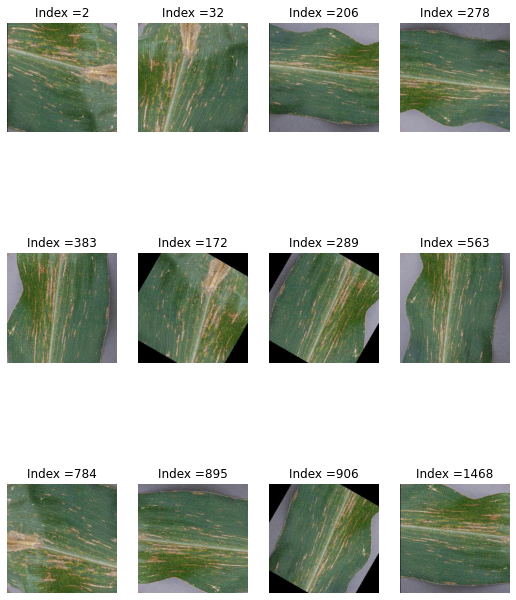

In [ ]:
# affichage des 12 images du dataframe précédent

affiche_images(df_new_plant_disease[df_new_plant_disease['nom_fichier_filtrer']],3,4)

# Les images intitulé 'copy' correspondent à des images zoomées
# Elles ont a priori un 'fichier_code' différent de l'image mère et sont taguées possède un 'photo_changed' qui n'indique pas qu'elles ont ubi un zoom
# Certaines images après zoom sont encore géométriquement modifiées (ex : index = 535 et 616 : rotation à 180 

In [ ]:
df_copy = df[df['nom_fichier_ref'].str.contains("copy")]
print("nombre d'entrée contenant copy=",len(df_copy))
df_copy['nom_fichier_ref'].value_counts()

nombre d'entrée contenant copy= 1556


RS_GLSp 4607 copy      3
RS_GLSp 4491 copy      3
RS_GLSp 4599 copy      3
RS_GLSp 4450 copy      3
RS_GLSp 4378 copy 2    3
                      ..
R.S_HL 0631 copy 2     1
R.S_HL 8023 copy       1
R.S_HL 5547 copy       1
R.S_HL 0604 copy       1
R.S_HL 8014 copy 3     1
Name: nom_fichier_ref, Length: 1318, dtype: Int64

## 2.2.Présentation des variables

In [ ]:
# Information sur les différents champs : liste des colonnes et type
df_new_plant_disease.info()

#  Presentation 1ère ligne (nom complet présenté)
pd.set_option('display.max_colwidth', 500)
df_new_plant_disease.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87867 entries, 0 to 455
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fichier           87867 non-null  string
 1   chemin_complet    87867 non-null  string
 2   resolution        87867 non-null  string
 3   poids             87867 non-null  int64 
 4   train_valid       87867 non-null  string
 5   plante_maladie    87867 non-null  string
 6   plante            87867 non-null  string
 7   maladie           87867 non-null  string
 8   nom_fichier       87867 non-null  string
 9   extension         87867 non-null  string
 10  nom_fichier_code  85483 non-null  string
 11  nom_fichier_ref   87867 non-null  string
 12  photo_changed     87867 non-null  string
dtypes: int64(1), string(12)
memory usage: 9.4 MB


fichier  ... photo_changed
0  20b33342-6c05-4cab-9008-6f09548a0db9___RS_Late.B 5128.JPG  ...     NA_manuel

[1 rows x 13 columns]

Présentation des différentes variables du dataframe : **df_new_plant_disease**

---
**fichier**
*  Type : string
*  Variable correspondant au nom du fichier des images des échantillons
---
**chemin_complet**
*  Type : string
*  Variable correspondant au chemin complet du fichier des images des échantillons : répertoires et sous répertoires et nom du fichier
---
**resolution**
*  Type :string
*  Variable présentant la résolution de l'image
---
**poids**
*  Type : int
*  Variable quantitative présentant la taille en octets du fichier
---
**train_valid**
*  Type : string
*  Variable catégorielle indiquant si la photo est dans le répertoire 'train' ou 'valid' (ie échantillons d'entrainement ou de validation)
---
**plante_maladie**
*  Type : string
*  Variable catégorielle regroupant le nom de la plante et la maladie (ou non: 'healthy') séparéée par '___'
---
**plante**
*  Type string
*  Variable catégorielle présentant le nom de la plante 
---
**maladie**
*  Type string
*  Variable catégorielle présentant le nom de la maladie (ou non : 'healthy')
**nom_fichier**
*  Type string
*  Variable correspondant au nom du fichier des images des échantillons sans l'extension
---
**extension**
*  Type string
*  Variable catégorielle prénsetant l'extension (ou type) de l'image
---
**nom_fichier_code**
*  Type string
*  Variable correspondant à la première partie du nom du fichier (nom_fichier) correspondant à un code (codification non identifiée)
---
**nom_fichier_ref**
*  Type string
*  Variable correspondant à la seconde partie du nom du fichier (nom_fichier) correspondant à un identifiant de la photo (a priori non unique)
---
**photo_changed**
*  Type string
*  Variable catégorielle correspondant à la troisième partie du nom du fichier (nom_fichier) correspondant à une modification apportée à une image initiale (effet de rotation, flip, zoom...). Ainsi, une même photo initiale a été dupliquée, modifiée puis renommée en ajoutant cette dénomination à la fin du nom. 
---

## 2.3.Eléments d'analyse statistique du jeu de données

### 2.3.1. Variables 'resolution', 'poids' & 'train_valid'

In [ ]:
# La variable catégorielle 'resolution' présente une valeur unique 256 x 256
df_new_plant_disease.resolution.value_counts()

256x256    87867
Name: resolution, dtype: Int64

In [ ]:
# Variable quantitative 'poids' : la taille des photos est relativement dispersée avec un noyau autour de 16Ko.
# Les photos de tailles extremes (surout faibles) pourraient mérites d'être regardées (2,7Ko)
df_new_plant_disease.describe()

poids
count  87867.000000
mean   16239.835433
std     4112.987056
min     2693.000000
25%    13152.000000
50%    16630.000000
75%    19337.000000
max    30721.000000

In [ ]:
# La variable catégorielle 'train_valid' révèle une répartition 20/80% pour l'échantillon de validation vs d'entrainement
df_new_plant_disease.train_valid.value_counts()

train    70295
valid    17572
Name: train_valid, dtype: Int64

### 2.3.2. Variables 'plante_maladie', 'plante' et 'maladie'

In [ ]:
# La Variable catégorielle 'plante_maladie' présente toutes les combinaisons de plantes et maladies illustrées par des photos
# Nous disposons d'une représentation équilibrée des différentes combinaisons : 2000 à 2500 photos
# La non présence de maladie est codée comme pour les maladies. On dispose ainsi pour chaque plante (ou presque), d'un échantillon plante/saine au même titre que plante/maladie x (quantité équivalente)
df_new_plant_disease.plante_maladie.value_counts()

Soybean___healthy                                     2527
Apple___Apple_scab                                    2520
Orange___Haunglongbing_(Citrus_greening)              2513
Apple___healthy                                       2510
Pepper,_bell___healthy                                2485
Apple___Black_rot                                     2484
Tomato___Tomato_Yellow_Leaf_Curl_Virus                2451
Potato___Late_blight                                  2424
Potato___Early_blight                                 2424
Tomato___healthy                                      2407
Tomato___Early_blight                                 2400
Grape___Esca_(Black_Measles)                          2400
Pepper,_bell___Bacterial_spot                         2391
Corn_(maize)___Northern_Leaf_Blight                   2385
Corn_(maize)___Common_rust_                           2384
Grape___Black_rot                                     2360
Tomato___Leaf_Mold                                    23

In [ ]:
# La Variable catégorielle 'plante' présente toutes plante illustrées par des photos.
# Le nombre de photos illustrant chaque plantes est hétérogène ce qui traduit un nombre de maladies étudiées par plantes également hétérogène.
# La tomate est nettement sur-représentée (sur étudiée en termes de maladies). Le groupe pommes/maïs/raisin/pomme de terre a été également approfondi. 
df_new_plant_disease.plante.value_counts()

Tomato                     22930
Apple                       9714
Corn_(maize)                9145
Grape                       9027
Potato                      7128
Pepper,_bell                4876
Strawberry                  4498
Peach                       4457
Cherry_(including_sour)     4386
Soybean                     2527
Orange                      2513
Blueberry                   2270
Raspberry                   2226
Squash                      2170
Name: plante, dtype: Int64

In [ ]:
# La Variable catégorielle 'maladie' représente 20 maladies et 1 catégorie saine (' healthy').
# Les 5 premières maladies sont sur-représentées tandis que les autres sont illustrées par 200 à 2500 photos.
# Comme vu avec la présentation de la variable 'plante_maladie', le nombre élevé de plantes saines est cohérent avec le fait que l'on dispose d'un échantillon plante/saine pour chaque plante
df_new_plant_disease.maladie.value_counts()

healthy                                 27866
Bacterial_spot                           6815
Black_rot                                4844
Early_blight                             4824
Late_blight                              4738
Powdery_mildew                           4274
Apple_scab                               2520
Haunglongbing_(Citrus_greening)          2513
Tomato_Yellow_Leaf_Curl_Virus            2451
Esca_(Black_Measles)                     2400
Northern_Leaf_Blight                     2385
Common_rust_                             2384
Leaf_Mold                                2352
Target_Spot                              2284
Tomato_mosaic_virus                      2238
Leaf_scorch                              2218
Cedar_apple_rust                         2200
Septoria_leaf_spot                       2181
Spider_mites Two-spotted_spider_mite     2176
Leaf_blight_(Isariopsis_Leaf_Spot)       2152
Cercospora_leaf_spot Gray_leaf_spot      2052
Name: maladie, dtype: Int64

In [ ]:
# Un tableau croisé entre plante et maladie montre que
#  - 2 plantes n'ont pas d'échantillon de photo saines : orange et courgette
#  - 3 plantes n'ont pas d'échantillon de phots avec maladies : Blueberry, Raspberry, Soybean
pd.crosstab(df_new_plant_disease.plante, df_new_plant_disease.maladie, rownames=['plante'], colnames=['maladie'] )

maladie                  Apple_scab  ...  healthy
plante                               ...         
Apple                          2520  ...     2510
Blueberry                         0  ...     2270
Cherry_(including_sour)           0  ...     2282
Corn_(maize)                      0  ...     2324
Grape                             0  ...     2115
Orange                            0  ...        0
Peach                             0  ...     2160
Pepper,_bell                      0  ...     2485
Potato                            0  ...     2280
Raspberry                         0  ...     2226
Soybean                           0  ...     2527
Squash                            0  ...        0
Strawberry                        0  ...     2280
Tomato                            0  ...     2407

[14 rows x 21 columns]

### 2.3.3. Variables 'extension', 'nom_fichier_ref/code, 'photo_changed'

In [ ]:
# La variable catégorielle 'extension' présente 2 valeurs '.JPG' et '.jpg' qui correspondent à 1 même format d'image : jpeg
df_new_plant_disease.extension.value_counts()

.JPG    84821
.jpg     3046
Name: extension, dtype: Int64

In [ ]:
# Les 2 champs nom_fichier_code et nom_fichier_ref : 2 parties principales de nom_fichier
#   - Aucune référence manquante
print(df_new_plant_disease[df_new_plant_disease.nom_fichier_ref==''].count())
#   - 2 384 codes manquants
df_new_plant_disease[df_new_plant_disease.nom_fichier_code.isna()].count()

fichier                0
chemin_complet         0
resolution             0
poids                  0
train_valid            0
plante_maladie         0
plante                 0
maladie                0
nom_fichier            0
extension              0
nom_fichier_code       0
nom_fichier_ref        0
photo_changed          0
nom_fichier_filtrer    0
dtype: int64


fichier                2384
chemin_complet         2384
resolution             2384
poids                  2384
train_valid            2384
plante_maladie         2384
plante                 2384
maladie                2384
nom_fichier            2384
extension              2384
nom_fichier_code          0
nom_fichier_ref        2384
photo_changed          2384
nom_fichier_filtrer    2384
dtype: int64

In [ ]:
# La Variable catégorielle 'photo_changed' présente des types de modification apportées à des photos permettant d'augmenter la taille de l'échantillon.
# 'NA_manuel' correspond aux photo initiales. Une analyse complémentaire est nécéssaire pour confirmer qu'il n'y a pas d'autres doublons/autres modifications résiduelles (cf 'copy' trouvé dans le champ nom_fichier_ref parmi les photos initiales)
# On note l'important recours à la symétrie et la rotation de 180 pour obtenir de nouvelles photos
df_new_plant_disease.photo_changed.value_counts()

NA_manuel          47410
flipLR              8491
180deg              8198
flipTB              6805
new30degFlipLR      4822
270deg              4174
90deg               4174
newPixel25          2179
new30degFlipTB       427
newGRR               427
new90degFlipTB       152
newGGR               152
new90degFlipLR       152
new200degFlipTB      152
new200degFlipLR      152
Name: photo_changed, dtype: Int64

# **3.Visualisation des données et interprétation**

## 3.1.Vue d'ensemble par plante et par maladie

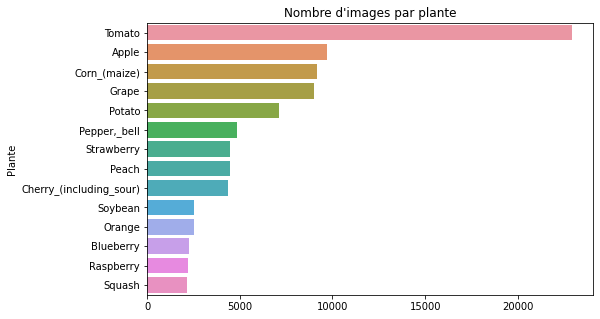

In [ ]:
# Nombre total d'images par plante
df_new_plant_disease_PLANTE = df_new_plant_disease['plante']
plt.figure( figsize= (8, 5) )  
sns.barplot(y=df_new_plant_disease_PLANTE.value_counts().index,
            x=df_new_plant_disease_PLANTE.value_counts())
plt.title("Nombre d'images par plante")
plt.xlabel('')
plt.ylabel('Plante');

# La tomate est sur-représentée par rapport aux autres classes

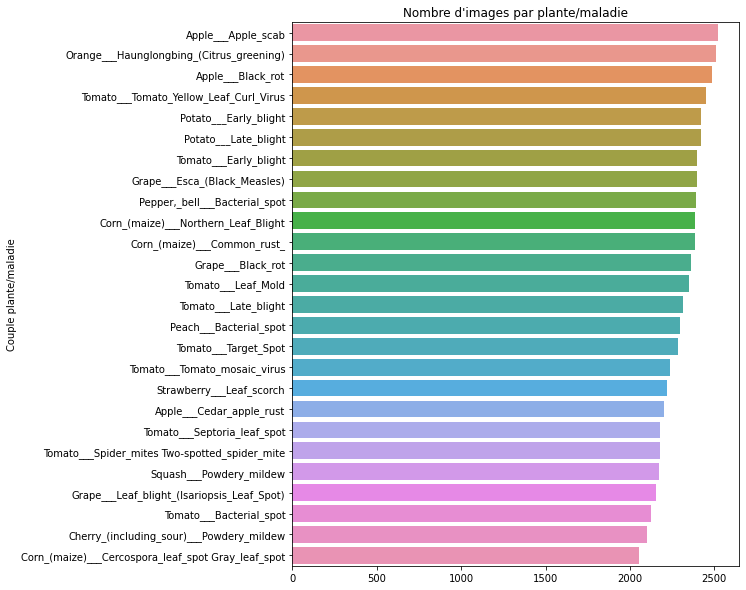

In [ ]:
# Nombre d'images par plante/maladie
df_new_plant_disease_MALADIE = df_new_plant_disease[df_new_plant_disease['maladie']!='healthy']['plante_maladie']

plt.figure( figsize= (8, 10) )  
sns.barplot(y=df_new_plant_disease_MALADIE.value_counts().index,
            x=df_new_plant_disease_MALADIE.value_counts())
plt.title("Nombre d'images par plante/maladie")
plt.xlabel('')
plt.ylabel('Couple plante/maladie');

# Les 38 classes sont représentées de façon homogène.

## 3.2.Segmentation par plante/maladie et plante/maladie

''

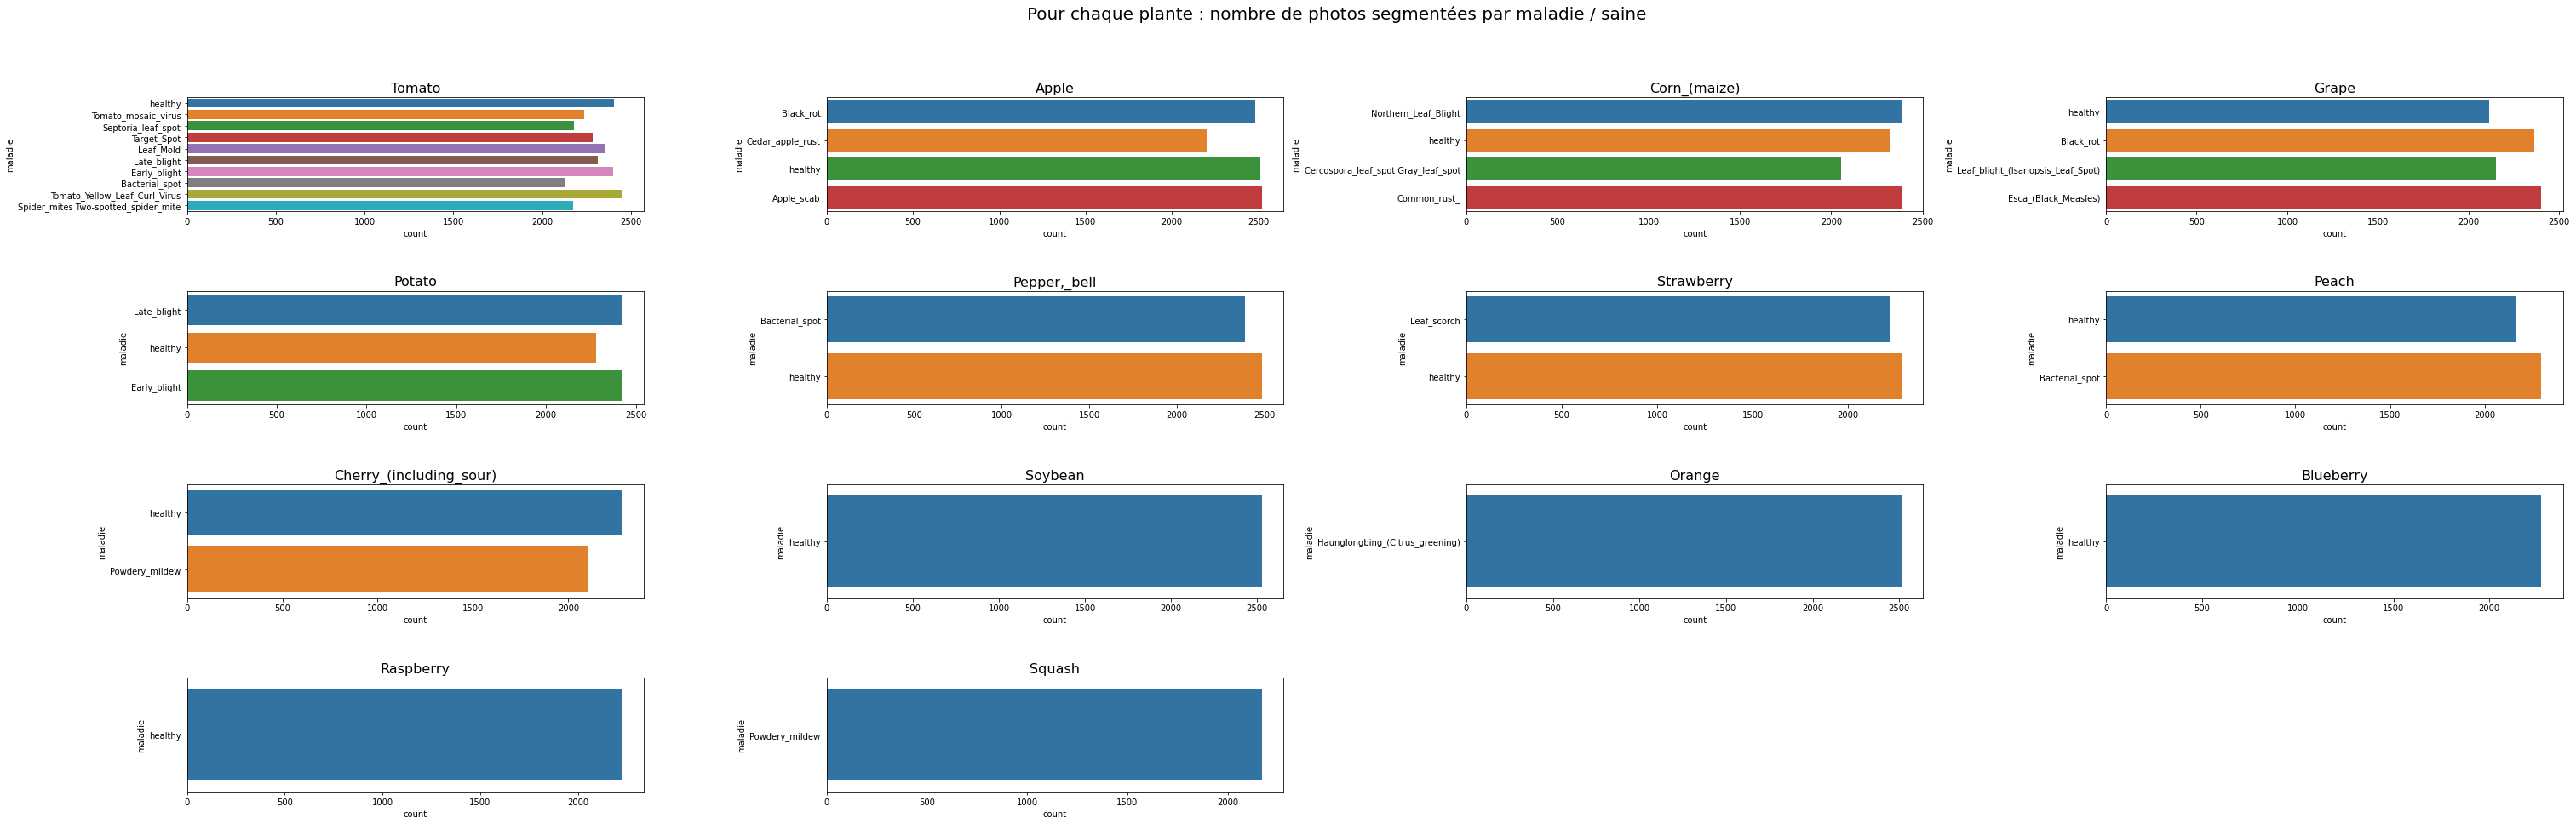

In [ ]:
# Pour chaque plante, présentation du nombre de photos par maladie (avec saine)

f = plt.figure(figsize=(50,15))
plt.suptitle('Pour chaque plante : nombre de photos segmentées par maladie / saine', color='black', fontsize=20)
plt.subplots_adjust(wspace = 0.4, hspace=0.7)

for g, plante in zip(np.arange(0,14), df_new_plant_disease.plante.value_counts().index):
      ax = f.add_subplot(4,4,g+1)
      sns.countplot(y=df_new_plant_disease[df_new_plant_disease.plante==plante].maladie, ax=ax)  #ax=ax[g])
      
      ax.set_title(plante, fontsize=16)
      #ax.set_yticklabels([])
;

# On voit que la tomate, avec 10 maladies, est sur-représentée par rapport aux autre plantes.
# Trois plantes n'ont pas de maladie (Soybean, Blueberry, Raspberry).
# Deux plantes n'ont pas de représentation saine (Orange, Squash)
# Remarque : click sur l'image pour visualization plus confortable

''

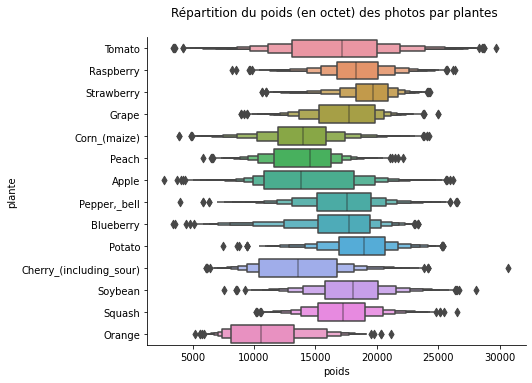

In [ ]:
# Répartition de la taille de photo par plante #(/maladie)
sns.catplot(data=df_new_plant_disease, y='plante', x='poids', kind='boxen', height=5, aspect=1.5 )
#sns.catplot(data=df_new_plant_disease, y='maladie', x='poids', kind='boxen', height=5, aspect=1.5 )
plt.title('Répartition du poids (en octet) des photos par plante \n')
;

# La distribution est similaire d'une classe à l'autre (moyennes semblables et présence d'outsiders).
# Le poids ne devrait pas influencer la classification.

## 3.3.Modification des photos : photo_changed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(Text(0.5, 0, 'Nombre de version de chaque code'),)

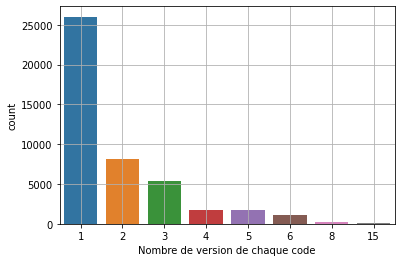

In [ ]:
%matplotlib inline

# nombre d'image par code
df_nbre_im_code =df_new_plant_disease['nom_fichier_code'].value_counts()

# visualisation du nombre d'image par code
sns.countplot(df_nbre_im_code,x=len(df_nbre_im_code.unique())),
plt.grid(True)
plt.xlabel('Nombre de version de chaque code'),


#df_nbre_im_code.sort_values(ascending=True)

# La majorité des images n'est pas transformée. L'augmentation de données est partielle.

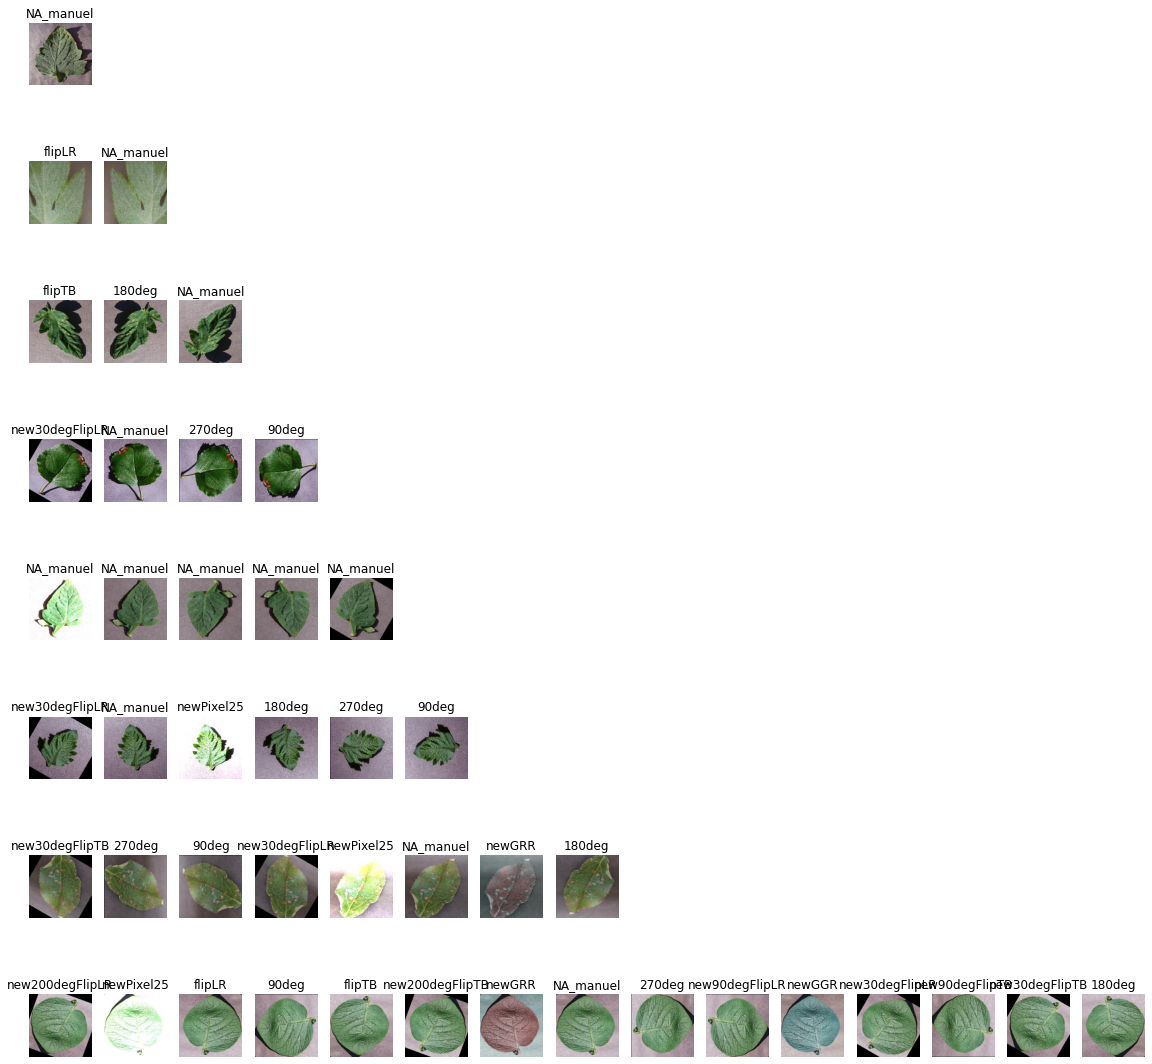

In [ ]:
# visu des différentes modif d'image : par nombre de version de m'image 1->15
# Les augmentations crées par des isométries semblent en plus grand nombre 
# Les transformations plus compliquées(GRR, NewPixel25) semblent venir en supplément des transformations plus simples 
# et sont présentes dans le cas où il y a beaucoup de variantes
# Si une seule variante de l'image, alors le tag 'photo_changed' est 'NA_manuel'

u=np.sort(df_nbre_im_code.unique())
h=plt.figure(figsize=(20,20))
for i,n in enumerate(u):

  code = df_nbre_im_code[df_nbre_im_code==n]
  code = code.index[0]  
  #print(code)
  df_visu=df_new_plant_disease[df_new_plant_disease['nom_fichier_code']==code]
  
  for j in range(len(df_visu)):
    plt.subplot(len(u),u.max(),j+1+i*u.max())
    chemin = df_visu['chemin_complet'].iloc[j]
    plt.imshow(plt.imread(chemin))

    plt.title(df_visu['photo_changed'].iloc[j])
    plt.axis('off')




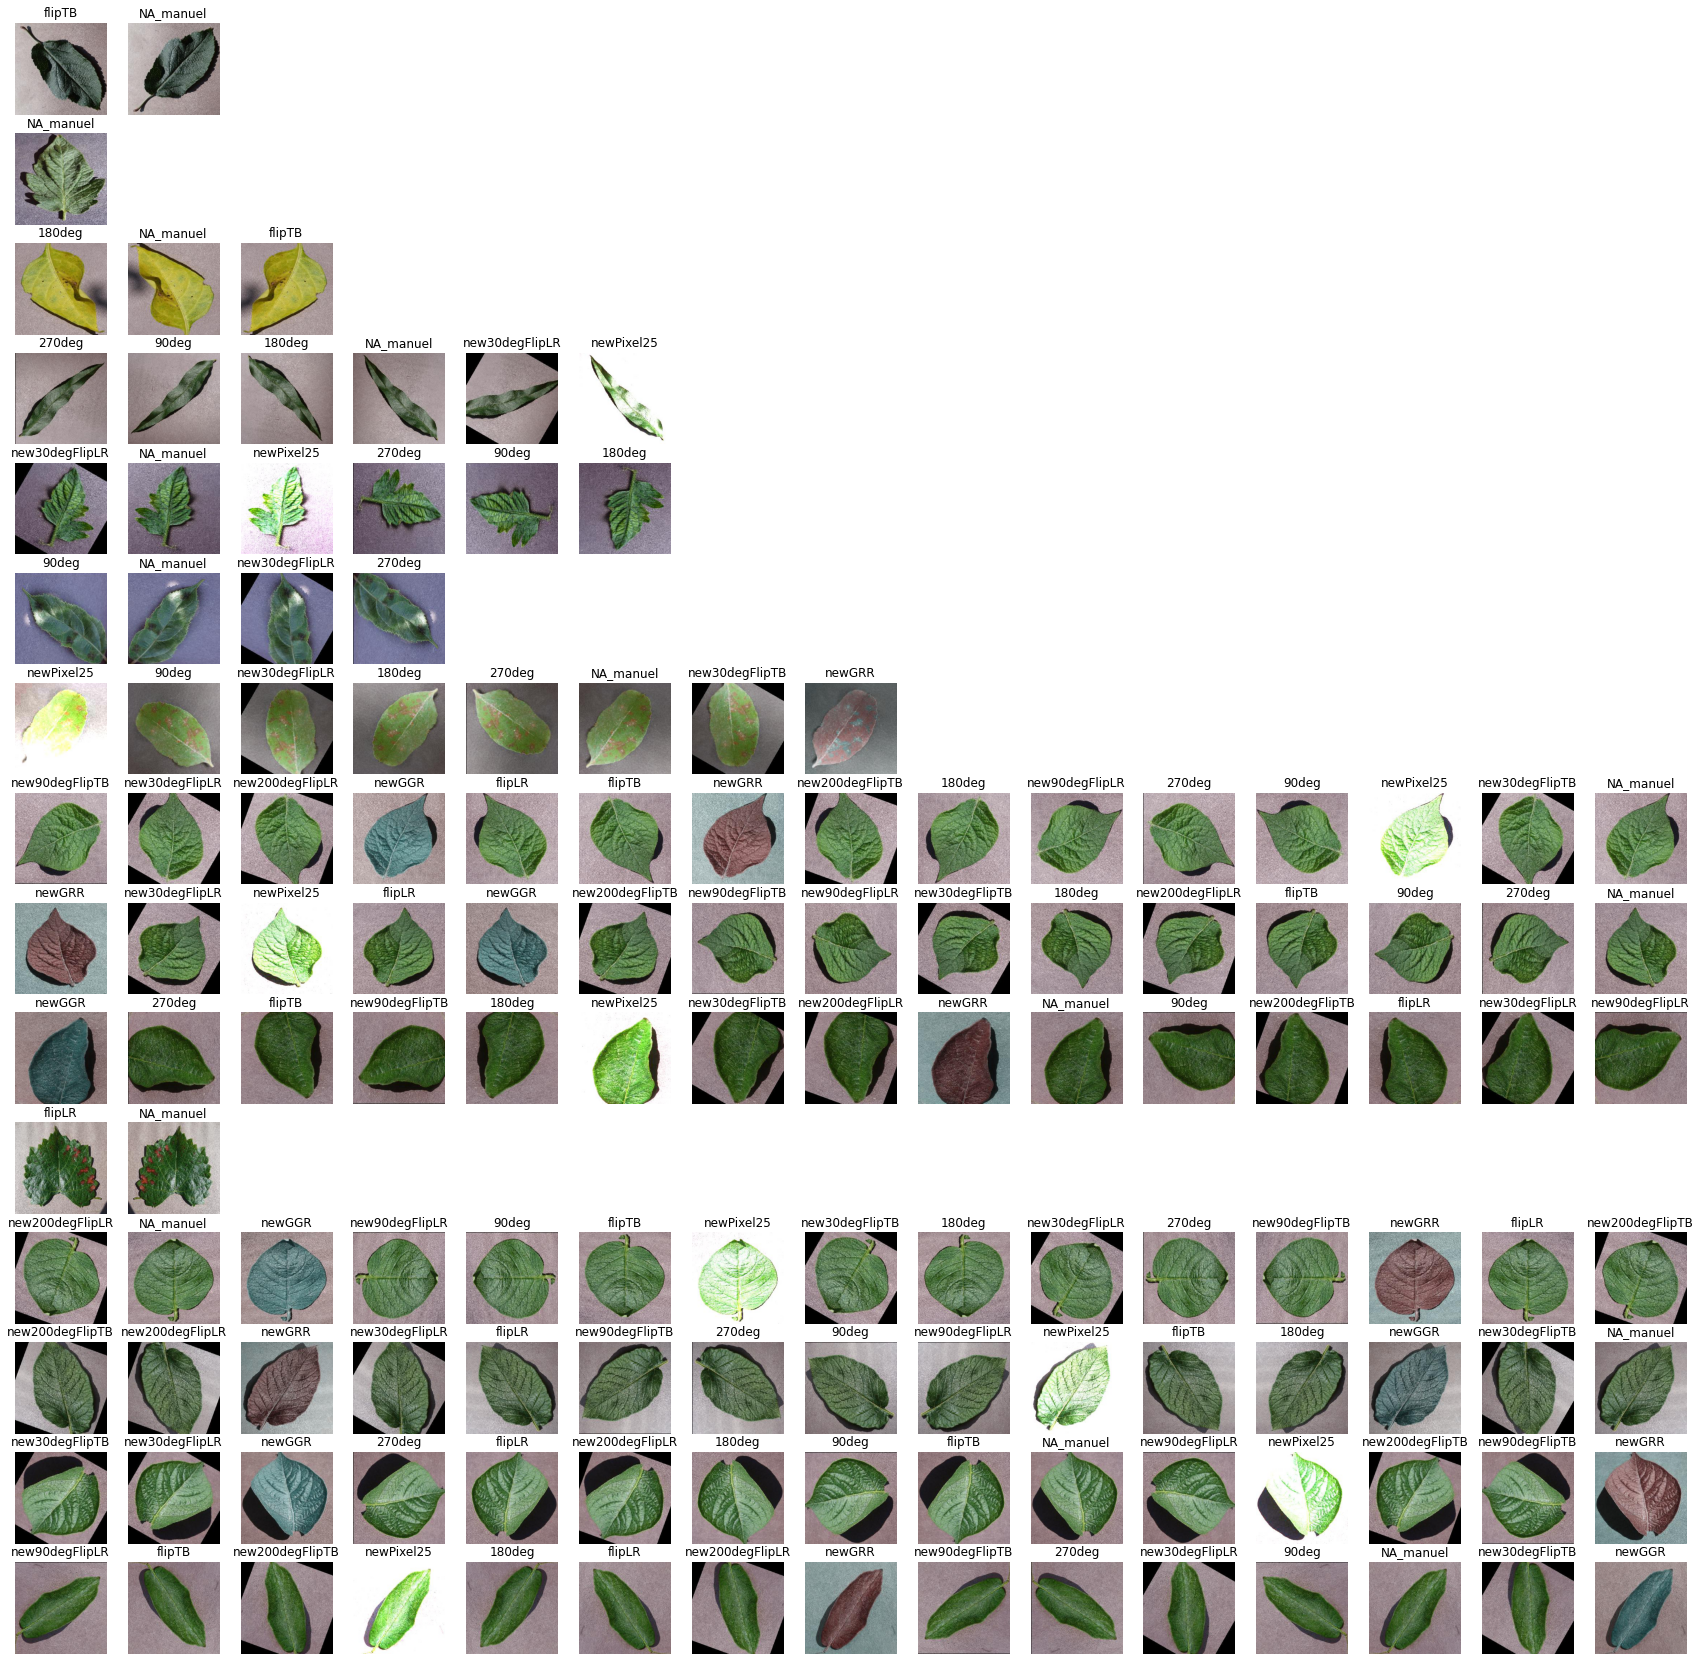

In [ ]:
# on va faire la meme chose en recupérant toutes les modif images : il semblerait que les changements d'espace de couleur GRR et GGR aient une visée "métier" : celui de faire apparaitre les eventuelles taches sur les feuilles
# les rotations sont faites dans le sens trigonométrique
# Interrogation sur la nature de la transformation new Pixel 25 (suppression du fond, egalisation d'histogramme ?)

from random import randrange,seed
seed(a=951,version=2)

modif = df_new_plant_disease['photo_changed'].unique()
h=plt.figure(figsize=(30,30))
for i,mod in enumerate(modif):

  code = df_new_plant_disease[df_new_plant_disease['photo_changed']==mod]
  code = code['nom_fichier_code'].iloc[randrange(len(code))]
  #print(code)
  df_visu=df_new_plant_disease[df_new_plant_disease['nom_fichier_code']==code]
  df_visu_sans_modif = df_visu.drop(index = df_visu[df_visu['photo_changed']==mod].index)
  
  plt.subplot(len(modif),u.max(),1+i*u.max())
  chemin = df_visu[df_visu['photo_changed']==mod]
  chemin=chemin['chemin_complet'].iloc[0]
  plt.imshow(plt.imread(chemin))
  plt.title(mod)
  plt.axis('off')

  for j in range(len(df_visu_sans_modif)):
    plt.subplot(len(modif),u.max(),j+2+i*u.max())
    chemin = df_visu_sans_modif['chemin_complet'].iloc[j]
    plt.imshow(plt.imread(chemin))

    plt.title(df_visu_sans_modif['photo_changed'].iloc[j])
    plt.axis('off')



# **4. Conclusion**

Nous disposons donc d'un jeu données de 38 classes (couple plante/maladie). Chaque classe contient environ 2000 à 2500 photos. Aucune classe n'est donc sous-représentée ou sur-représentée.

Toutefois, certaines plantes comme la tomate apparaissent dans plusieurs classes car elles sont sensibles à beaucoup de maladies. Nous nous demandons si cette répartition pourrait biaiser le futur modèle.

Les photos ont toutes la même définition (256x256 pixels) et sont toutes en couleur. Le poids des photos ne devrait pas influencer la classification car sa distribution est similaire d'une classe à une autre. L'augmentation partielle des données a déjà été réalisée.

Les photos sont réparties pour 80% dans un jeu d'entraînement et 20% dans un jeu de test.

En conclusion, le jeu de données est prêt à l'emploi.